In [1]:
import numpy as  np
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
""" from google.colab import drive
drive.mount('/content/drive') """

Mounted at /content/drive


In [41]:
filename = "audiogramdataonesheet_2.xlsx"

In [42]:
df = pd.read_excel(filename)
df.head()

,Subjects,125Hz,250Hz,500Hz,750Hz,1000Hz,stim,Type
0,Sub_1,18.64,2.04,1.80,1.88,0.48,BMLD,ABR
1,Sub_2,4.88,5.32,3.16,6.96,3.52,BMLD,ABR
2,Sub_3,10.36,13.16,10.36,8.96,5.60,BMLD,ABR
3,Sub_4,7.28,4.28,4.56,3.28,2.08,BMLD,ABR
4,Sub_5,2.24,4.48,5.60,19.60,15.20,BMLD,ABR


In [17]:
import scipy.stats as stats

In [34]:
df_MLR_inphase =  df.loc[(df['Type'] == 'MLR') & (df['stim'] == 'SoNo')]
inphase = df_MLR_inphase[f].values
df_MLR_antiphase =  df.loc[(df['Type'] == 'MLR') & (df['stim'] == 'SpiNo')]
antiphase = df_MLR_antiphase[f].values
print(df_MLR_inphase)

    Subjects  125Hz  250Hz  500Hz  750Hz  1000Hz  stim Type
140    Sub_1  14.60  24.52  20.88  10.68   14.76  SoNo  MLR
141    Sub_2  22.84  15.04  13.84  16.40   26.20  SoNo  MLR
142    Sub_3  36.84  34.32  25.92  30.96   37.68  SoNo  MLR
143    Sub_4  21.44  15.60  19.20  13.96   15.40  SoNo  MLR
144    Sub_5  51.76  53.00  32.64  30.96   48.88  SoNo  MLR
145    Sub_6  25.04  14.12  15.48  19.12   21.52  SoNo  MLR
146    Sub_7  16.64  41.04  51.68  53.44   46.36  SoNo  MLR
147    Sub_8  12.16  10.76  12.12  15.16   18.92  SoNo  MLR
148    Sub_9  29.56  24.24  15.04  11.60   16.00  SoNo  MLR
149   Sub_10  32.08  33.48  25.08  19.44   33.76  SoNo  MLR
150   Sub_11  10.68  10.60  10.60  10.60   10.68  SoNo  MLR
151   Sub_12  34.88  26.48  12.36  11.72   16.64  SoNo  MLR
152   Sub_13  36.28  33.48  31.80  10.76   11.88  SoNo  MLR
153   Sub_14  44.40  52.12  51.28  37.96   36.00  SoNo  MLR
154   Sub_15  29.00  22.28  12.84  13.84   14.36  SoNo  MLR
155   Sub_16  17.44  16.96  18.64  29.28

In [38]:
freqs=['125Hz',	'250Hz','500Hz'	,'750Hz','1000Hz']
dur= ['MLR','LLR','ABR']

for f in freqs:
    for d in dur:
        print('************************************************')
        print(f'freq={f} and duration={dur}')
        print('****************************************')
        df_MLR_inphase =  df.loc[(df['Type'] == d) & (df['stim'] == 'SoNo')]
        inphase = df_MLR_inphase[f].values
        df_MLR_antiphase =  df.loc[(df['Type'] == d) & (df['stim'] == 'SpiNo')]
        antiphase = df_MLR_antiphase[f].values
        # Check normality assumption
        # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        # axes[0].hist(inphase)
        # axes[0].set_title("Inphase")
        # axes[1].hist(antiphase)
        # axes[1].set_title("Antiphase")
        # plt.show()

        _, inphase_pval = stats.shapiro(inphase)
        _, antiphase_pval = stats.shapiro(antiphase)

        print("Normality tests:")
        print(f"Inphase Shapiro-Wilk p-value: {inphase_pval:.3f}")
        print(f"Antiphase Shapiro-Wilk p-value: {antiphase_pval:.3f}")

        # Check equal variance assumption
        _, var_pval = stats.levene(inphase, antiphase)

        print("Equal variance test:")
        print(f"Levene's test p-value: {var_pval:.3f}")
        stat, pval = stats.mannwhitneyu(inphase, antiphase, alternative='two-sided')

        print(f"Mann-Whitney U test statistic: {stat:.3f}")
        print(f"Mann-Whitney U test p-value: {pval:.3f}")
        stat, pval = stats.wilcoxon(inphase, antiphase)

        print(f"Wilcoxon signed-rank test statistic: {stat:.3f}")
        print(f"Wilcoxon signed-rank test p-value: {pval:.3f}")
        stat, pval = stats.kruskal(inphase, antiphase)

        print(f"Kruskal-Wallis test statistic: {stat:.3f}")
        print(f"Kruskal-Wallis test p-value: {pval:.3f}")
        
    # stat, pval = stats.friedmanchisquare(inphase, antiphase)

    # print(f"Friedman test statistic: {stat:.3f}")
    # print(f"Friedman test p-value: {pval:.3f}")

************************************************
freq=125Hz and duration=['MLR', 'LLR', 'ABR']
****************************************
Normality tests:
Inphase Shapiro-Wilk p-value: 0.039
Antiphase Shapiro-Wilk p-value: 0.000
Equal variance test:
Levene's test p-value: 0.146
Mann-Whitney U test statistic: 832.000
Mann-Whitney U test p-value: 0.010
Wilcoxon signed-rank test statistic: 105.000
Wilcoxon signed-rank test p-value: 0.001
Kruskal-Wallis test statistic: 6.649
Kruskal-Wallis test p-value: 0.010
************************************************
freq=125Hz and duration=['MLR', 'LLR', 'ABR']
****************************************
Normality tests:
Inphase Shapiro-Wilk p-value: 0.065
Antiphase Shapiro-Wilk p-value: 0.000
Equal variance test:
Levene's test p-value: 0.012
Mann-Whitney U test statistic: 891.000
Mann-Whitney U test p-value: 0.001
Wilcoxon signed-rank test statistic: 23.000
Wilcoxon signed-rank test p-value: 0.000
Kruskal-Wallis test statistic: 10.703
Kruskal-Wallis te

C:\Users\kaleem\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [40]:





freqs = ['125Hz', '250Hz', '500Hz', '750Hz', '1000Hz']
dur = ['MLR', 'LLR', 'ABR']

test_names = [ 'Mann-Whitney U test',
              ' Wilcoxon signed-rank test',
              ' Kruskal-Wallis test']

# Create an empty dataframe to store p-values
result_df = pd.DataFrame(columns=['test_name', 'duration', '125Hz', '250Hz', '500Hz', '750Hz', '1000Hz'])

for f in freqs:
    for d in dur:
        print(f'************duration is {d} and freq is {f}******************')
        df_MLR_inphase = df.loc[(df['Type'] == d) & (df['stim'] == 'SoNo')]
        inphase = df_MLR_inphase[f].values
        df_MLR_antiphase = df.loc[(df['Type'] == d) & (df['stim'] == 'SpiNo')]
        antiphase = df_MLR_antiphase[f].values

        # Check normality assumption
        _, inphase_pval = stats.shapiro(inphase)
        _, antiphase_pval = stats.shapiro(antiphase)

        print("Normality tests:")
        print(f"Inphase Shapiro-Wilk p-value: {inphase_pval:.3f}")
        print(f"Antiphase Shapiro-Wilk p-value: {antiphase_pval:.3f}")

        # Check equal variance assumption
        _, var_pval = stats.levene(inphase, antiphase)

        print("Equal variance test:")
        print(f"Levene's test p-value: {var_pval:.3f}")

        # Perform statistical tests and store p-values
        p_values = []
        stat, pval = stats.mannwhitneyu(inphase, antiphase, alternative='two-sided')
        p_values.append(pval)
        stat, pval = stats.wilcoxon(inphase, antiphase)
        p_values.append(pval)
        stat, pval = stats.kruskal(inphase, antiphase)
        p_values.append(pval)

        # Add test results to the dataframe
        temp_df = pd.DataFrame([[test_names[i], d, *p_values] for i in range(len(test_names))],
                               columns=['test_name', 'duration', '125Hz', '250Hz', '500Hz', '750Hz', '1000Hz'])
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

# Save the dataframe to a CSV file
result_df.to_csv("p_values.csv", index=False)


************duration is MLR and freq is 125Hz******************
Normality tests:
Inphase Shapiro-Wilk p-value: 0.039
Antiphase Shapiro-Wilk p-value: 0.000
Equal variance test:
Levene's test p-value: 0.146


C:\Users\kaleem\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


ValueError: 7 columns passed, passed data had 5 columns

In [32]:
result_df.head()

,testname,dur,125Hz,250Hz,500Hz,750Hz,1000Hz
0,Mann-Whitney U,MLR,0.010091,NaN,NaN,NaN,NaN
1,Wilcoxon signed-rank,MLR,0.000998,NaN,NaN,NaN,NaN
2,Kruskal-Wallis,MLR,0.009921,NaN,NaN,NaN,NaN
3,Mann-Whitney U,LLR,0.001092,NaN,NaN,NaN,NaN
4,Wilcoxon signed-rank,LLR,0.000003,NaN,NaN,NaN,NaN


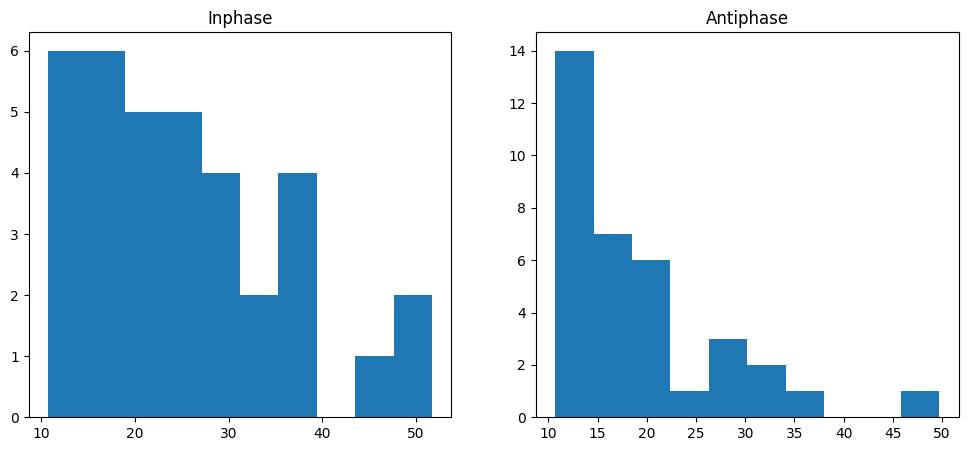

Normality tests:
Inphase Shapiro-Wilk p-value: 0.039
Antiphase Shapiro-Wilk p-value: 0.000
Equal variance test:
Levene's test p-value: 0.146


In [15]:



# Check normality assumption
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(inphase)
axes[0].set_title("Inphase")
axes[1].hist(antiphase)
axes[1].set_title("Antiphase")
plt.show()

_, inphase_pval = stats.shapiro(inphase)
_, antiphase_pval = stats.shapiro(antiphase)

print("Normality tests:")
print(f"Inphase Shapiro-Wilk p-value: {inphase_pval:.3f}")
print(f"Antiphase Shapiro-Wilk p-value: {antiphase_pval:.3f}")

# Check equal variance assumption
_, var_pval = stats.levene(inphase, antiphase)

print("Equal variance test:")
print(f"Levene's test p-value: {var_pval:.3f}")

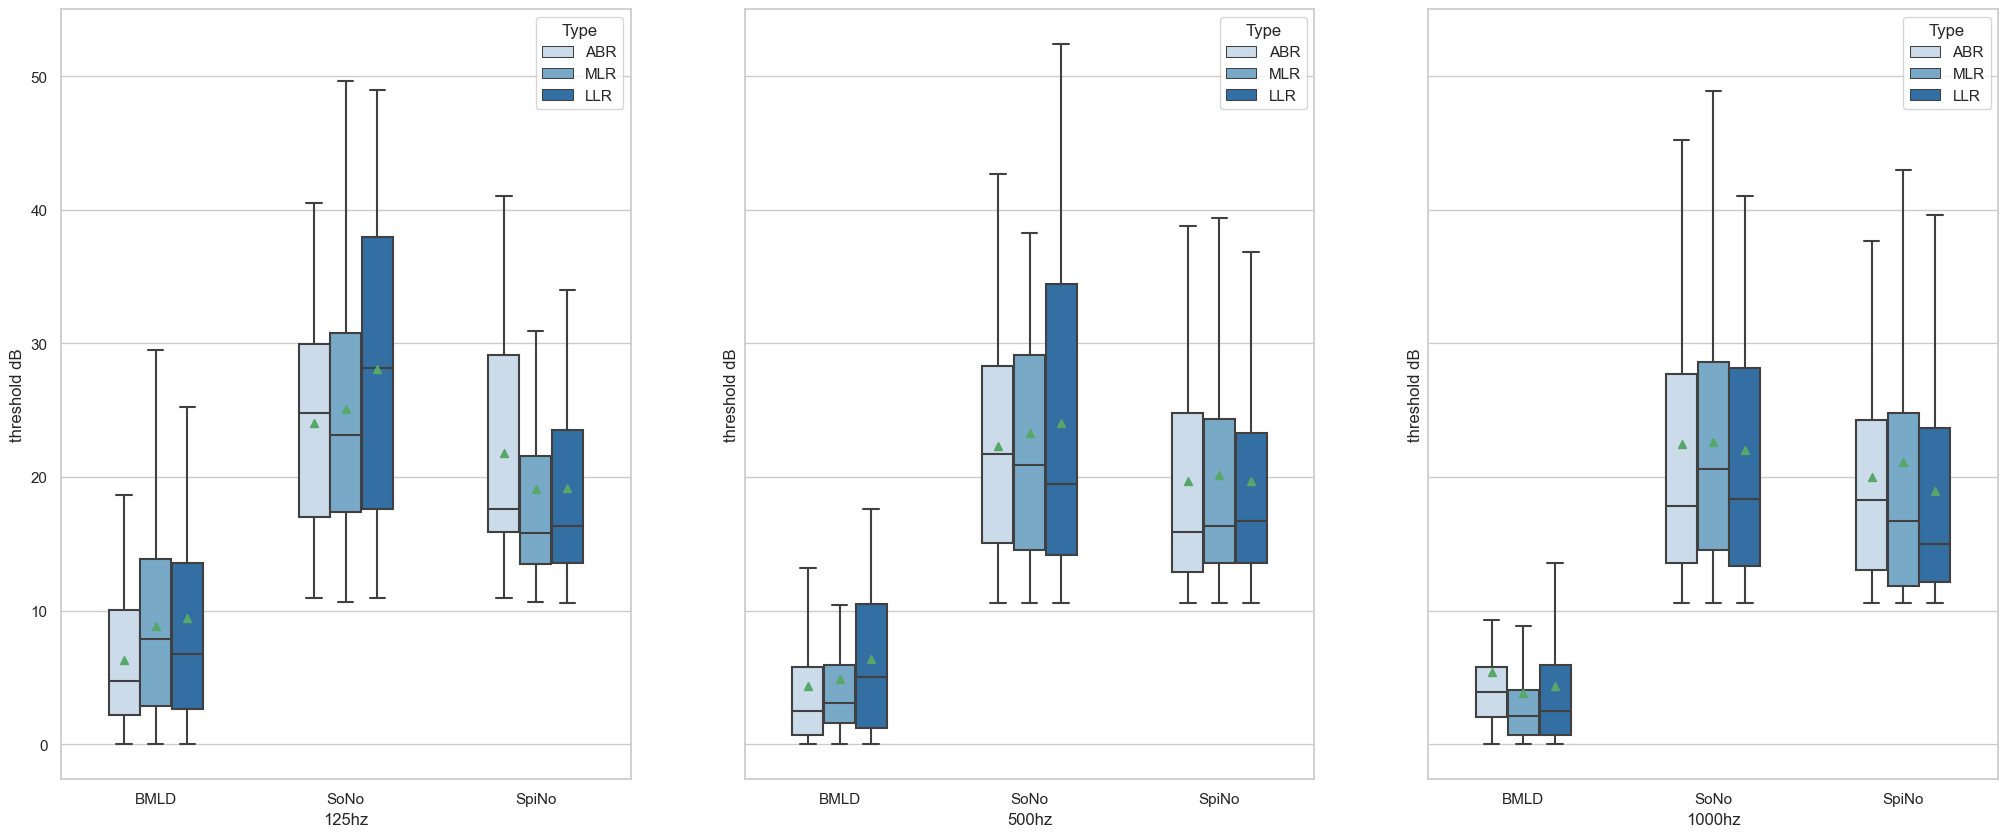

In [6]:
sb.set_theme(style="whitegrid")
f, axs = plt.subplots(1,3,  figsize=(25,10), sharey=True)

p=sb.boxplot( x=df["stim"], y=df["125Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[0],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "125hz")



p=sb.boxplot( x=df["stim"], y=df["500Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[1],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "500hz")



p=sb.boxplot( x=df["stim"], y=df["1000Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[2],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "1000hz")
plt.show()

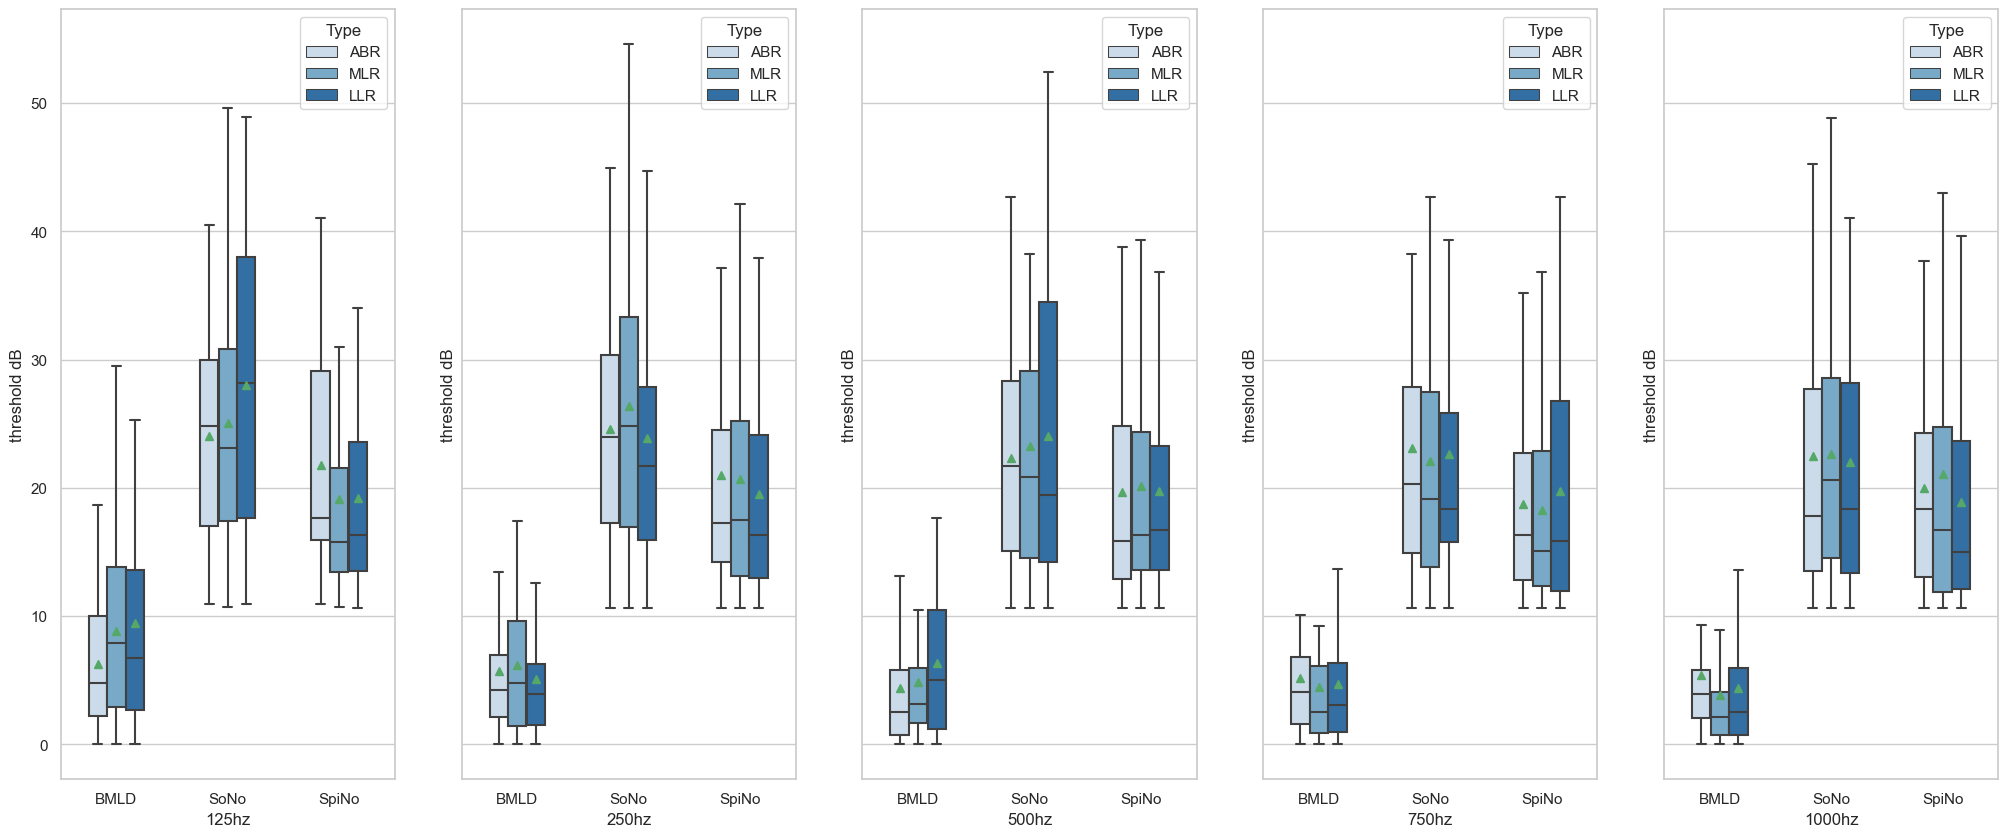

In [7]:
sb.set_theme(style="whitegrid")
f, axs = plt.subplots(1,5,  figsize=(25,10), sharey=True)

p=sb.boxplot( x=df["stim"], y=df["125Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[0],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "125hz")

p=sb.boxplot( x=df["stim"], y=df["250Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[1],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "250hz")

p=sb.boxplot( x=df["stim"], y=df["500Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[2],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "500hz")

p=sb.boxplot( x=df["stim"], y=df["750Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[3],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "750hz")

p=sb.boxplot( x=df["stim"], y=df["1000Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[4],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "1000hz")
plt.show()

In [16]:
filename = "/content/drive/MyDrive/Upwork/AEPEEGanaylsis/Review paper/audiogramdataonesheet.xlsx"

In [8]:
df = pd.read_excel(filename)
df.head()

,Subjects,125Hz,250Hz,500Hz,750Hz,1000Hz,stim,Type
0,Sub_1,18.64,2.04,1.80,1.88,0.48,BMLD,ABR
1,Sub_2,4.88,5.32,3.16,6.96,3.52,BMLD,ABR
2,Sub_3,10.36,13.16,10.36,8.96,5.60,BMLD,ABR
3,Sub_4,7.28,4.28,4.56,3.28,2.08,BMLD,ABR
4,Sub_5,2.24,4.48,5.60,19.60,15.20,BMLD,ABR


In [9]:
abrfreq=df.iloc[:, 1::9] 
abrfreq=abrfreq.T
abrfreq=abrfreq.reset_index();
abrfreq.head()

,index,0,1,2,3,4,5,6,7,8,...,305,306,307,308,309,310,311,312,313,314
0,125Hz,18.64,4.88,10.36,7.28,2.24,0.04,24.52,0.04,3.36,...,12.52,14.52,16.6,28.44,25.08,15.12,18.92,14.88,21.76,12.2
